In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Read data
df = pd.read_csv('baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [16]:
len(df)

1232

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAD', 'MIL', 'MIN', 'MON', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBD', 'TEX', 'TOR', 'CAL']
    Team    W  Playoffs  teamCode  WPlayoffs
330  ANA   75         0         0        NaN
331  ARI   92         1         1       92.0
332  ATL   88         1         2       88.0
333  BAL   63         0         3        NaN
334  BOS   82         0         4        NaN
335  CHC   88         0         5        NaN
336  CHW   83         0         6        NaN
337  CIN   66         0         7        NaN
338  CLE   91         1         8       91.0
339  COL   73         0         9        NaN
340  DET   66         0        10        NaN
341  FLA   76         0        11        NaN
342  HOU   93         1        12       93.0
343  KCR   65         0        13        NaN
344  LAD   86         0        14        NaN
345  MIL   68         0        15        NaN
346  MIN   85    

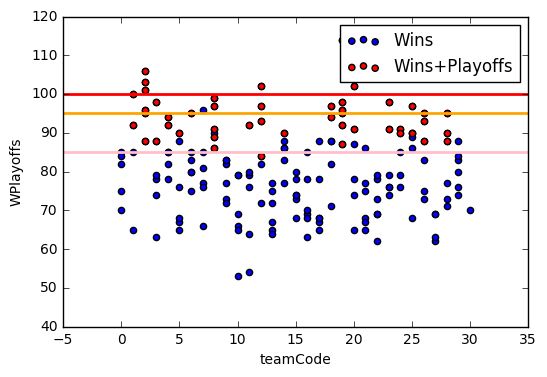

In [18]:
##### PLOT the benchmark wins
#take the time to understand this part

mydf = df.loc[(df.Year >= 1996) & (df.Year <= 2001), ['Team', 'W', 'Playoffs']]
# How many records in mydf

# Get unique team names
team_list = list(mydf.Team.unique())
# See what team_list looks like

# Create team code column
import math
teamCode = []
# For each row in the column,
for row in mydf['Team']:
    code = team_list.index(row)
    if code >= 0:
        teamCode.append(code)
    else:
        # Append a nan
        teamCode.append(math.nan)

# what is the length if teamCode)?
 
# Create a column in the data frame from the list
mydf['teamCode'] = teamCode

# Create a new column 'Wins given gone to playoffs'
mydf['WPlayoffs'] = np.where(mydf['Playoffs']==1, mydf['W'], float('nan'))




# Clear plot
plt.clf()
# https://github.com/pydata/pandas/issues/9909
# 2 y axes
# secondary axis does not work on scatter plot
ax=mydf.plot(kind='scatter',x='teamCode',y='W',label='Wins',color='blue')
mydf.plot(kind='scatter',x='teamCode',y='WPlayoffs',label='Wins+Playoffs',color='red', \
    ax=ax,secondary_y=True)
plt.axhline(y=95, color = 'orange', linewidth=2)
plt.axhline(y=85, color = 'pink', linewidth=2)
plt.axhline(y=100, color = 'red', linewidth=2)
plt.show()

In [5]:
df1 = df.query('Year < 2002')
newCol = df1.RS - df1.RA           # This is a data series
ds=newCol.to_frame()               # Convert this series to a data frame
ds.columns=['RD']                  # Name the column of this data frame
df1 = pd.concat([df1,ds],axis=1)   # pandas.pydata.org/pandas-docs/stable/merging.html
#df1.head()
df1[['RS','RA','RD']].head()

,RS,RA,RD
330,691,730,-39
331,818,677,141
332,729,643,86
333,687,829,-142
334,772,745,27


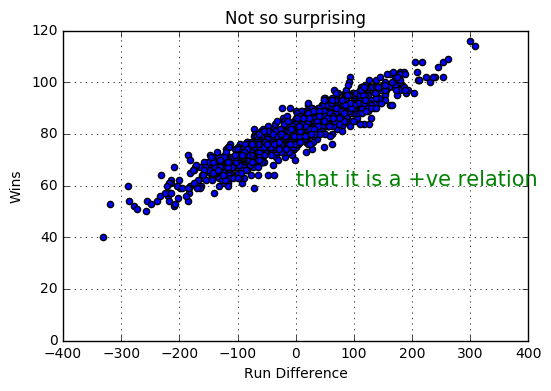

In [6]:
##### BEGIN of actual analysis

# Method 2 - results in warnings
#df1 = df.query('Year < 2002')
#newCol = df1.RS - df1.RA
#df1.loc[:,'RD'] = newCol

# Method 3 - results in warnings
#df1 = df.query('Year < 2002')
#df1['RD'] = df1['RS']-df1['RA']
#print(df1['RD'])

plt.clf()
plt.scatter(df1['RD'],df1['W'])
plt.xlabel('Run Difference')
plt.ylabel('Wins')
plt.title('Not so surprising')
plt.axis([-400, 400, 0, 120])
plt.text(0, 60, 'that it is a +ve relation', color='green', fontsize=15)
plt.grid(True)
plt.show()

In [7]:
# Model 1
from sklearn import linear_model
from pandas import DataFrame

myData = DataFrame(data = df1, columns = ['W', 'RD'])
model = linear_model.LinearRegression(fit_intercept = True)
RD = myData.RD.values.reshape(len(myData), 1)
W = myData.W.values.reshape(len(myData), 1)
fit = model.fit(RD, W)
print ('Intercept: %.4f, Run Difference: %.4f' % (fit.intercept_, fit.coef_))

from sklearn.metrics import r2_score
pred = model.predict(RD)
r2 = r2_score(W,pred) 
print ('R-squared: %.4f' % (r2))
print()
print('R-squared: %.4f using alternate method' % fit.score(RD, W)) # Another way to get R2
# myref: http://nbviewer.jupyter.org/github/wuillou8/SuperRepository/blob/master/MLearning/Python/SCIKIT/EXOAdSquare/Adsquare.html

Intercept: 80.8814, Run Difference: 0.1058
R-squared: 0.8808

R-squared: 0.8808 using alternate method


In [1]:
# Model 2
# http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html
#RS = f(OBP, SLG)
#RS = f(OBP, SLG, BA)

x = DataFrame(data = df1, columns = ['OBP', 'SLG','BA'])
xarr = x.as_matrix()
X = np.array([np.concatenate((v,[1])) for v in xarr])
model = linear_model.LinearRegression(fit_intercept = True)
y = DataFrame(data = df1, columns = ['RS'])
yarr = y.as_matrix()
fit = model.fit(X,yarr)
#fit.intercept_
#fit.coef_

print("Intercept : ", fit.intercept_)
print("Slope : ", fit.coef_)

from sklearn.metrics import r2_score
pred = model.predict(X)
r2 = r2_score(yarr,pred) 
print ('R-squared: %.4f' % (r2))

NameError: name 'DataFrame' is not defined

In [10]:
# Model 2 (continued) ...
# Remove BA due to reasons of multicollinearity
x = pd.DataFrame(data = df1, columns = ['OBP', 'SLG'])
xarr = x.as_matrix()
X = np.array([np.concatenate((v,[1])) for v in xarr])
model = linear_model.LinearRegression(fit_intercept = True)
y = DataFrame(data = df1, columns = ['RS'])
yarr = y.as_matrix()
fit = model.fit(X,yarr)
fit.intercept_
fit.coef_

from sklearn.metrics import r2_score
pred = model.predict(X)
r2 = r2_score(yarr, pred) 
print ('R-squared: %.4f' % (r2))

R-squared: 0.9296


In [11]:
# Model 3
# Runs allowed
# RA = f(OOBP, OSLG)

mydata = DataFrame(data = df1, columns = ['RA','OOBP', 'OSLG'])
len(mydata)
mydata1 = mydata.dropna()
len(mydata1)

x = DataFrame(data = mydata1, columns = ['OOBP', 'OSLG'])
xarr = x.as_matrix()
X = np.array([np.concatenate((v,[1])) for v in xarr])
model = linear_model.LinearRegression(fit_intercept = True)
y = DataFrame(data = mydata1, columns = ['RA'])
yarr = y.as_matrix()
fit = model.fit(X,yarr)
print("Intercept : ",fit.intercept_)
print("Slope : ", fit.coef_)

from sklearn.metrics import r2_score
pred = model.predict(X)
r2 = r2_score(yarr,pred) 
print ('R-squared: %.4f' % (r2))

Intercept :  [-837.37788861]
Slope :  [[ 2913.59948582  1514.28595842     0.        ]]
R-squared: 0.9073
